# Problem 2: Newsgroups

The code for this multilayer perceptron can be found in `newsgroups.py`. The module `utils.py` contains helper functions to load the dataset, display progress bar, plot graphs, etc.

In [1]:
import sys
sys.path.append('../src/')
from newsgroups_v2 import *

---
## Building the Model

We initialize the parameters of the single-layer MLP.

In [2]:
# Model parameters
batch_size = 64
layers = [61188, 100, 20]
learning_rate = 1e-4
momentum = 0.9
eps = 1e-5
train_filename = "../data/newsgroups/matlab/train"
test_filename = "../data/newsgroups/matlab/test"
saved = "../data/newsgroups/saved/"
train_size = 11269
test_size = 7505

We now load the data into Torch tensors.

In [3]:
lr_search = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
nb_epochs = 20

### No Preprocessing

In [4]:
# Load dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "count")
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [5]:
# Build and train model
train_acc, test_acc = torch.zeros(len(lr_search), nb_epochs), torch.zeros(len(lr_search), nb_epochs) 

for i, lr in enumerate(lr_search):
    print("%s\nLearning rate = %.5f\n%s" % ("="*30, lr, "-"*30))
    mlp_t = Newsgroups(layers, lr, momentum)
    _, train, test = mlp_t.train(nb_epochs, train_loader, test_loader)
    train_acc[i] = torch.FloatTensor(train)
    test_acc[i] = torch.FloatTensor(test)

Learning rate = 0.10000
------------------------------
Epoch 1/20
Avg loss: 15.6256 -- Train acc: 0.0432 -- Test acc: 0.0434
Epoch 2/20


KeyboardInterrupt: 

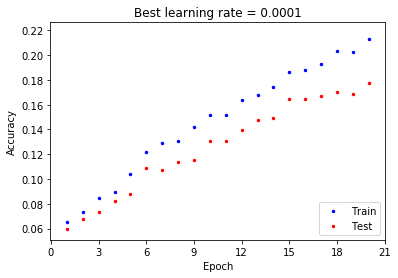

In [19]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], 
    ["Train", "Test"], "Accuracy", "Best learning rate = {}".format(best_lr))

### TF-IDF

In [4]:
# Load dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "tfidf")
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [33]:
# Build and train model
train_acc, test_acc = torch.zeros(len(lr_search), nb_epochs), torch.zeros(len(lr_search), nb_epochs) 

for i, lr in enumerate(lr_search):
    print("%s\nLearning rate = %.5f\n%s" % ("="*30, lr, "-"*30))
    mlp_t = Newsgroups(layers, lr, momentum)
    _, train, test = mlp_t.train(nb_epochs, train_loader, test_loader)
    train_acc[i] = torch.FloatTensor(train)
    test_acc[i] = torch.FloatTensor(test)

Learning rate = 0.10000
------------------------------
Epoch 1/10
Avg loss: 12.2553 -- Train acc: 0.0420 -- Test acc: 0.0432
Epoch 2/10
Avg loss: 14.7035 -- Train acc: 0.0427 -- Test acc: 0.0429
Epoch 3/10
Avg loss: 17.1478 -- Train acc: 0.0433 -- Test acc: 0.0440
Epoch 4/10
Avg loss: 17.4266 -- Train acc: 0.0430 -- Test acc: 0.0432
Epoch 5/10
Avg loss: 18.2547 -- Train acc: 0.0438 -- Test acc: 0.0432
Epoch 6/10
Avg loss: 4.5566 -- Train acc: 0.0437 -- Test acc: 0.0432
Epoch 7/10
Avg loss: 4.5410 -- Train acc: 0.0437 -- Test acc: 0.0432
Epoch 8/10
Avg loss: 5.4732 -- Train acc: 0.0437 -- Test acc: 0.0432
Epoch 9/10
Avg loss: 4.5493 -- Train acc: 0.0437 -- Test acc: 0.0432
Epoch 10/10
Avg loss: 4.5434 -- Train acc: 0.0437 -- Test acc: 0.0432
Training done! Elapsed time: 0:00:22

Learning rate = 0.01000
------------------------------
Epoch 1/10
Avg loss: 3.5126 -- Train acc: 0.0559 -- Test acc: 0.0561
Epoch 2/10
Avg loss: 3.3018 -- Train acc: 0.0561 -- Test acc: 0.0553
Epoch 3/10
Avg los

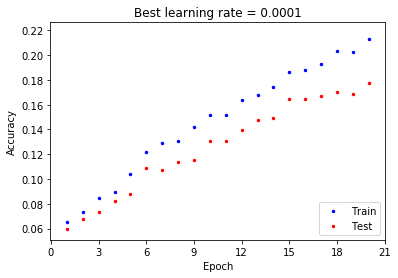

In [20]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], 
    ["Train", "Test"], "Accuracy", "Best learning rate = {}".format(best_lr))

### Standardization

In [3]:
# Load dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "stand", eps)
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [28]:
# Build and train model
train_acc, test_acc = torch.zeros(len(lr_search), nb_epochs), torch.zeros(len(lr_search), nb_epochs) 

for i, lr in enumerate(lr_search):
    print("%s\nLearning rate = %.5f\n%s" % ("="*30, lr, "-"*30))
    mlp_t = Newsgroups(layers, lr, momentum)
    _, train, test = mlp_t.train(nb_epochs, train_loader, test_loader)
    train_acc[i] = torch.FloatTensor(train)
    test_acc[i] = torch.FloatTensor(test)

Learning rate = 0.10000
------------------------------
Epoch 1/3
Avg loss: 10.8232 -- Train acc: 0.0410 -- Test acc: 0.0413
Epoch 2/3
Avg loss: 7.8368 -- Train acc: 0.0425 -- Test acc: 0.0430
Epoch 3/3
Avg loss: 10.3764 -- Train acc: 0.0452 -- Test acc: 0.0438
Training done! Elapsed time: 0:00:06

Learning rate = 0.01000
------------------------------
Epoch 1/3
Avg loss: 3.4557 -- Train acc: 0.0557 -- Test acc: 0.0552
Epoch 2/3
Avg loss: 3.4261 -- Train acc: 0.0558 -- Test acc: 0.0556
Epoch 3/3
Avg loss: 3.3812 -- Train acc: 0.0581 -- Test acc: 0.0514
Training done! Elapsed time: 0:00:06



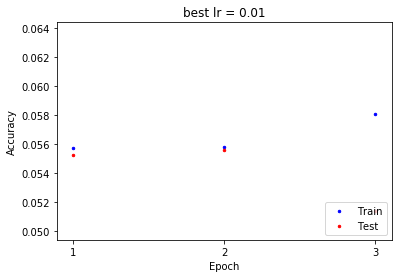

In [29]:
# Find best learning rate
best_lr_idx = test_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]
plots_per_epoch([train_acc[best_lr_idx], test_acc[best_lr_idx]], 
    ["Train", "Test"], "Accuracy", "Best learning rate = {}".format(best_lr))

---
## Variance in training

In [4]:
# Load tfidf dataset
train_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "tfidf")
learning_rate = 0.2

In [5]:
batch_size = 1
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [6]:
mlp_t = Newsgroups(layers, learning_rate, momentum)
train_loss, train_acc, test_acc = mlp_t.train(5000, train_loader, test_loader, by_epoch=False)

Epoch 1/5000
Training done! Elapsed time: 0:00:09



In [9]:
print(train_loss)

[3.441795825958252, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [10]:
batch_size = 100
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [11]:
train_loss, train_acc, test_acc = mlp_t.train(5000, train_loader, test_loader, by_epoch=False)

Epoch 1/5000
Epoch 2/5000
Epoch 3/5000
Epoch 4/5000
Epoch 5/5000
Epoch 6/5000
Epoch 7/5000
Epoch 8/5000
Epoch 9/5000
Epoch 10/5000
Epoch 11/5000
Epoch 12/5000
Epoch 13/5000
Epoch 14/5000
Epoch 15/5000
Epoch 16/5000
Epoch 17/5000
Epoch 18/5000
Epoch 19/5000
Epoch 20/5000
Epoch 21/5000
Epoch 22/5000
Epoch 23/5000
Epoch 24/5000
Epoch 25/5000
Epoch 26/5000
Epoch 27/5000
Epoch 28/5000
Epoch 29/5000
Epoch 30/5000
Epoch 31/5000
Epoch 32/5000
Epoch 33/5000
Epoch 34/5000
Epoch 35/5000
Epoch 36/5000
Epoch 37/5000
Epoch 38/5000
Epoch 39/5000
Epoch 40/5000
Epoch 41/5000
Epoch 42/5000
Epoch 43/5000
Epoch 44/5000
Epoch 45/5000
Training done! Elapsed time: 0:00:37



In [12]:
train_loss

[23.6053409576416,
 23.20534896850586,
 22.445348739624023,
 21.361337661743164,
 21.089128494262695,
 24.643644332885742,
 23.472105026245117,
 22.014728546142578,
 20.101469039916992,
 18.369304656982422,
 15.595925331115723,
 13.162960052490234,
 11.460330963134766,
 9.53671646118164,
 7.460786819458008,
 5.463123798370361,
 8.949556350708008,
 11.088665962219238,
 51.432552337646484,
 10.06513500213623,
 9.408466339111328,
 8.704330444335938,
 6.975943565368652,
 6.598024845123291,
 37004279808.0,
 5.479196071624756,
 4.583480358123779,
 3.8249781131744385,
 1877313.75,
 8.767871856689453,
 8.431090354919434,
 8.05447769165039,
 7.553142070770264,
 7.4617414474487305,
 11.488192558288574,
 11.302038192749023,
 10.735596656799316,
 9.864959716796875,
 9.042298316955566,
 8.487271308898926,
 9.334772109985352,
 9.006932258605957,
 8.533492088317871,
 7.880502223968506,
 7.025708198547363,
 8.716105461120605,
 12.750676155090332,
 12.29636001586914,
 11.722957611083984,
 11.0877542495

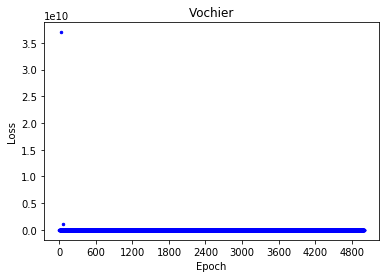

In [14]:
plot_per_epoch(train_loss, "Loss", "Vochier")